In [1]:
from stanfordcorenlp import StanfordCoreNLP
import json

In [2]:
host='http://66.76.242.198'
port=9888

nlp = StanfordCoreNLP(host, port=port,timeout=30000)

In [3]:
value = "This is a test message."

In [4]:
props = {
    'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
    'pipelineLanguage': 'en',
    'outputFormat': 'json'}

tokn=nlp.word_tokenize(value)

Pos=nlp.pos_tag(value)
Ner=nlp.ner(value)
Parse=nlp.parse(value)
Dep_parse=nlp.dependency_parse(value)
Json_data=json.loads(nlp.annotate(value, properties=props))

In [5]:
Json_data

{'sentences': [{'index': 0,
   'parse': '(ROOT\n  (S\n    (NP (DT This))\n    (VP (VBZ is)\n      (NP (DT a) (NN test) (NN message)))\n    (. .)))',
   'basicDependencies': [{'dep': 'ROOT',
     'governor': 0,
     'governorGloss': 'ROOT',
     'dependent': 5,
     'dependentGloss': 'message'},
    {'dep': 'nsubj',
     'governor': 5,
     'governorGloss': 'message',
     'dependent': 1,
     'dependentGloss': 'This'},
    {'dep': 'cop',
     'governor': 5,
     'governorGloss': 'message',
     'dependent': 2,
     'dependentGloss': 'is'},
    {'dep': 'det',
     'governor': 5,
     'governorGloss': 'message',
     'dependent': 3,
     'dependentGloss': 'a'},
    {'dep': 'compound',
     'governor': 5,
     'governorGloss': 'message',
     'dependent': 4,
     'dependentGloss': 'test'},
    {'dep': 'punct',
     'governor': 5,
     'governorGloss': 'message',
     'dependent': 6,
     'dependentGloss': '.'}],
   'enhancedDependencies': [{'dep': 'ROOT',
     'governor': 0,
     'governo

In [6]:
Parse

'(ROOT\n  (S\n    (NP (DT This))\n    (VP (VBZ is)\n      (NP (DT a) (NN test) (NN message)))\n    (. .)))'

In [7]:
tokn

['This', 'is', 'a', 'test', 'message', '.']

In [8]:
from nltk.tree import *

In [9]:
parse_tree = ParentedTree.fromstring(Parse)

In [10]:
type(parse_tree.pretty_print())

         ROOT                     
          |                        
          S                       
  ________|_____________________   
 |             VP               | 
 |     ________|___             |  
 NP   |            NP           | 
 |    |    ________|______      |  
 DT  VBZ  DT       NN     NN    . 
 |    |   |        |      |     |  
This  is  a       test message  . 



NoneType

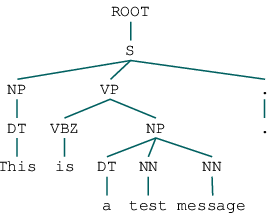

In [11]:
parse_tree

In [12]:
from nltk.draw.tree import TreeView

In [13]:
TreeView(parse_tree)._cframe.print_to_file('output.ps')

In [14]:
import os
os.system('convert output.ps output.png')

32512

In [15]:
from PIL import Image

psimage=Image.open('output.ps')
psimage.save('output.png')

In [16]:
parse_tree = ParentedTree.fromstring(Parse)

In [17]:
from nltk.treeprettyprinter import TreePrettyPrinter
pretty_tree = TreePrettyPrinter(parse_tree).text()

In [18]:
print("NLP Parse: \n {}".format(pretty_tree))

NLP Parse: 
          ROOT                     
          |                        
          S                       
  ________|_____________________   
 |             VP               | 
 |     ________|___             |  
 NP   |            NP           | 
 |    |    ________|______      |  
 DT  VBZ  DT       NN     NN    . 
 |    |   |        |      |     |  
This  is  a       test message  . 



In [19]:
pretty_tree

'         ROOT                     \n          |                        \n          S                       \n  ________|_____________________   \n |             VP               | \n |     ________|___             |  \n NP   |            NP           | \n |    |    ________|______      |  \n DT  VBZ  DT       NN     NN    . \n |    |   |        |      |     |  \nThis  is  a       test message  . \n'

In [21]:
tree = pretty_tree.split("\n")

In [22]:
tree

['         ROOT                     ',
 '          |                        ',
 '          S                       ',
 '  ________|_____________________   ',
 ' |             VP               | ',
 ' |     ________|___             |  ',
 ' NP   |            NP           | ',
 ' |    |    ________|______      |  ',
 ' DT  VBZ  DT       NN     NN    . ',
 ' |    |   |        |      |     |  ',
 'This  is  a       test message  . ',
 '']

In [23]:
print(*tree, sep = "\n")

         ROOT                     
          |                        
          S                       
  ________|_____________________   
 |             VP               | 
 |     ________|___             |  
 NP   |            NP           | 
 |    |    ________|______      |  
 DT  VBZ  DT       NN     NN    . 
 |    |   |        |      |     |  
This  is  a       test message  . 



In [27]:
import re
parse_print = '\n'.join(tree)
parse_print = re.sub(" ", "*", parse_print)

*********ROOT*********************
**********|************************
**********S***********************
**________|_____________________***
*|*************VP***************|*
*|*****________|___*************|**
*NP***|************NP***********|*
*|****|****________|______******|**
*DT**VBZ**DT*******NN*****NN****.*
*|****|***|********|******|*****|**
This**is**a*******test*message**.*

